In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-colorblind')

C:\Users\davisoc\AppData\Local\Temp\ipykernel_10060\3031116794.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-colorblind')


In [138]:
df1 = pd.read_pickle("./time_data/time_data_1.pkl") 
df2 = pd.read_pickle("./time_data/time_data_2.pkl")
df3 = pd.read_pickle("./time_data/time_data_3.pkl")
df = pd.concat([df1,df2,df3],ignore_index=True)

In [149]:
c = []
rows = df.shape[0]
for i in range(0,rows):
    if df["Our Time"][i] > df["ETE Time"][i]:
        # Our time is slower
        c.append("DarkBlue")
    else:
        # Our time is faster
        c.append("DarkGreen")

df["Color"] = c

In [150]:
df["Color"].value_counts()

DarkGreen    987
DarkBlue     513
Name: Color, dtype: int64

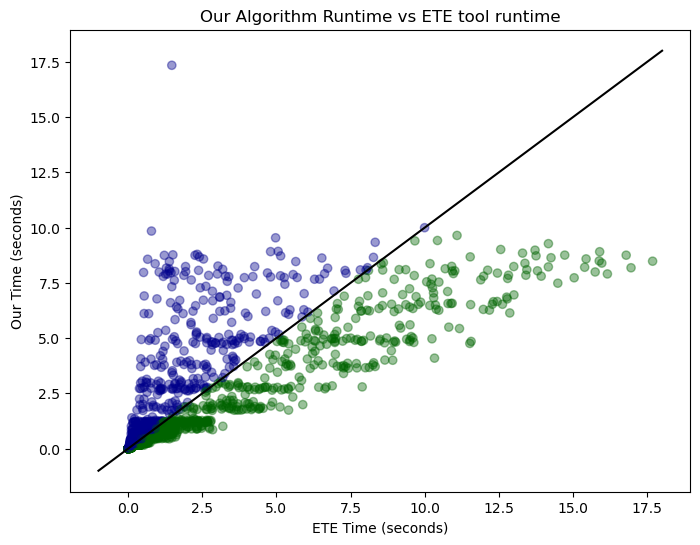

In [151]:
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(df["ETE Time"],df["Our Time"],c=df["Color"],alpha=0.4)
ax.plot([-1, 18], [-1, 18],c="Black")


ax.set_xlabel('ETE Time (seconds)')
ax.set_ylabel('Our Time (seconds)')
ax.set_title('Our Algorithm Runtime vs ETE tool runtime')

plt.show()

array([<Axes: title={'center': 'Our Time'}, xlabel='OTUs'>,
       <Axes: title={'center': 'ETE Time'}, xlabel='OTUs'>], dtype=object)

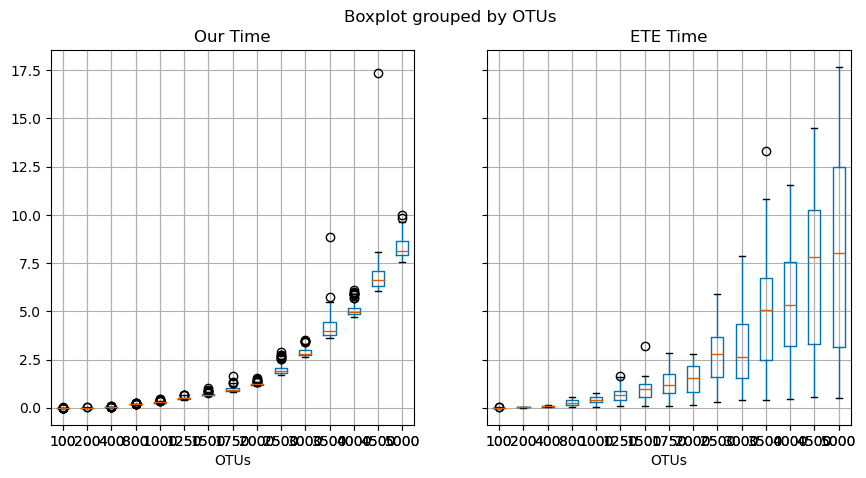

In [153]:
df.boxplot(column=['Our Time','ETE Time'], by='OTUs',figsize=(10,5))